# Load Data

In [2]:
dataset = np.load('../HIGGS.npy')
dataset_P = dataset[dataset[:,0]==0][:, 1:] # background (5829122, 28)
dataset_Q = dataset[dataset[:,0]==1][:, 1:] # signal     (5170877, 28)
dataset_P = torch.from_numpy(dataset_P).to(device, dtype)
dataset_Q = torch.from_numpy(dataset_Q).to(device, dtype)
del dataset

In [3]:
sys.path.append('../methods/Res_Net')
from model import Model
kernel = torch.load('../methods/Res_Net/checkpoints/n_tr=1300000'+'/kernel.pt')

# Run simulations

In [4]:
n_list = 10**np.linspace(0.5, 4, 20)
n_list = n_list.astype(int)
m_list = 10**np.linspace(0.5, 4, 20)
m_list = m_list.astype(int)
repeats = 1
pi = 0.1

In [5]:
type_1_error_mat = np.zeros((len(n_list), len(m_list), repeats))
type_2_error_mat = np.zeros((len(n_list), len(m_list), repeats))

In [6]:
gc.collect()
torch.cuda.empty_cache()
n_ev = 20000
for i, n in enumerate(tqdm(n_list, desc='n_list', leave=False)):
    if n<5000:
        batch_size = 10000
    else:
        batch_size = 5000
    type_1_error, type_2_error = lfi.test.simulate_error(dataset_P, dataset_Q,
                                                            1300000, n_ev, n, 
                                                            kernel, repeats,
                                                            pi, m_list,
                                                            batch_size,
                                                            plot_hist_path=None)
    type_1_error_mat[i, :, :] = type_1_error
    type_2_error_mat[i, :, :] = type_2_error
    # print gpu memory usage
    # print(torch.cuda.memory_allocated(device=device)/1e9)
    
    
np.save('type_1_error_mat.npy', type_1_error_mat)
np.save('type_2_error_mat.npy', type_2_error_mat)
Type1_mat = np.mean(type_1_error_mat, axis=2)
np.save('Type1_mat.npy', Type1_mat) 
Type2_mat = np.mean(type_2_error_mat, axis=2)
np.save('Type2_mat.npy', Type2_mat)
Type12_mat = np.mean(type_1_error_mat, axis=2)+np.mean(type_2_error_mat, axis=2)
np.save('Type12_mat.npy', Type12_mat)

n_list:   5%|▌         | 1/20 [00:05<01:47,  5.65s/it]

tensor(1.1921e-07, device='cuda:0')


n_list:  10%|█         | 2/20 [00:06<00:55,  3.09s/it]

tensor(9.9960e-08, device='cuda:0')


n_list:  15%|█▌        | 3/20 [00:08<00:38,  2.26s/it]

tensor(1.8128e-07, device='cuda:0')


n_list:  20%|██        | 4/20 [00:09<00:27,  1.71s/it]

tensor(9.1080e-07, device='cuda:0')


n_list:  25%|██▌       | 5/20 [00:10<00:21,  1.45s/it]

tensor(1.0898e-06, device='cuda:0')


n_list:  30%|███       | 6/20 [00:11<00:18,  1.30s/it]

tensor(1.1915e-06, device='cuda:0')


n_list:  35%|███▌      | 7/20 [00:12<00:16,  1.26s/it]

tensor(1.1554e-06, device='cuda:0')


n_list:  40%|████      | 8/20 [00:13<00:14,  1.18s/it]

tensor(4.0832e-06, device='cuda:0')


tensor(5.8832e-06, device='cuda:0')


n_list:  50%|█████     | 10/20 [00:15<00:10,  1.05s/it]

tensor(5.1984e-06, device='cuda:0')


tensor(8.4803e-06, device='cuda:0')


n_list:  60%|██████    | 12/20 [00:17<00:08,  1.09s/it]

tensor(8.9363e-06, device='cuda:0')


tensor(3.5359e-05, device='cuda:0')


n_list:  65%|██████▌   | 13/20 [00:18<00:08,  1.18s/it]

tensor(6.0206e-05, device='cuda:0')


n_list:  70%|███████   | 14/20 [00:20<00:08,  1.35s/it]

tensor(0.0001, device='cuda:0')


n_list:  75%|███████▌  | 15/20 [00:22<00:07,  1.55s/it]

tensor(0.0002, device='cuda:0')


n_list:  80%|████████  | 16/20 [00:24<00:07,  1.79s/it]

tensor(0.0002, device='cuda:0')


n_list:  85%|████████▌ | 17/20 [00:27<00:06,  2.14s/it]

tensor(0.0004, device='cuda:0')


n_list:  95%|█████████▌| 19/20 [00:34<00:02,  2.66s/it]

tensor(0.0006, device='cuda:0')


tensor(0.0003, device='cuda:0')


# Plot

In [7]:
Type12_mat = np.load('Type12_mat.npy')
Type12_mat_log = -np.log10(-np.log10(Type12_mat))

/tmp/ipykernel_916837/1506504982.py:2: RuntimeWarning: divide by zero encountered in log10
  Type12_mat_log = -np.log10(-np.log10(Type12_mat))
/tmp/ipykernel_916837/1506504982.py:2: RuntimeWarning: invalid value encountered in log10
  Type12_mat_log = -np.log10(-np.log10(Type12_mat))


[0.1        0.12845442 0.16057272 0.19590892 0.2339067  0.27394203
 0.31536447 0.35753323 0.39984607 0.44176023 0.48280553 0.52259074
 0.56080433 0.59721112 0.63164603 0.66400608 0.69424168 0.72234762
 0.74835465 0.77232155 0.79432823 0.81446965]


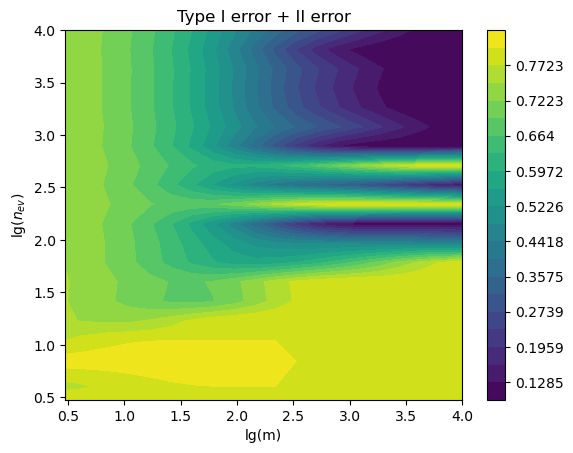

In [8]:
levels = 20
fig, ax = plt.subplots()
contourf_ = ax.contourf(np.log10(m_list), np.log10(n_list), Type12_mat, levels=levels)
cb = fig.colorbar(contourf_)
log_log_p_list = cb.mappable.levels 
real_p_list = 10**(-(10**(-log_log_p_list)))
print(real_p_list)
real_p_list = np.around(real_p_list, decimals=4)
real_p_list = real_p_list.astype(str)
# real_p_list[0] = '1.42e-16'
# real_p_list[1] = '6.02e-12'
# real_p_list[2] = '1.14e-08'
# real_p_list[3] = '2.38e-06'
cb.set_ticks(log_log_p_list[1:-1:2])
cb.set_ticklabels(real_p_list[1:-1:2])
# plt.xlim(1, 4)
# plt.ylim(1, 4)
plt.xlabel('lg(m)')
plt.ylabel('lg($n_{ev}$)')
plt.title('Type I error + II error')
plt.savefig('Type12_mat.pdf', dpi=300)